In [12]:
import pandas as pd
import numpy as np
from plotnine import *


In [13]:
path = "gym_members_exercise_tracking.csv"
df_gym = pd.read_csv(path)  

display(df_gym.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Workout_Type distintos:  ['Yoga' 'HIIT' 'Cardio' 'Strength']
Workout_Type count:    Workout_Type  count
0       Cardio    255
1         HIIT    221
2     Strength    258
3         Yoga    239


/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/stats/stat_count.py:66: FutureWarning: The provided callable <function sum at 0x10a03e160> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/stats/stat_count.py:66: FutureWarning: The provided callable <function sum at 0x10a03e160> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/stats/stat_count.py:66: FutureWarning: The provided callable <function sum at 0x10a03e160> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pa

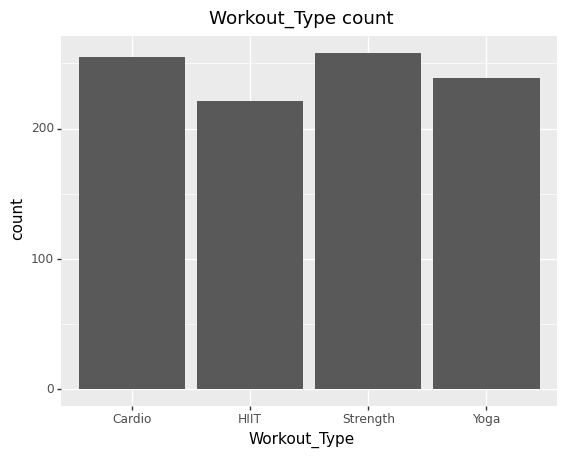

In [14]:
# Conta o número de Workout_Type

workouts_distintos = df_gym["Workout_Type"].unique()
print("Workout_Type distintos: ", workouts_distintos)

# Conta o número de Workout_Type
workouts_count = df_gym.groupby("Workout_Type").size().reset_index(name="count")
print("Workout_Type count: ", workouts_count)

# Plota o gráfico de barras proporcional em relação ao total

plot = (
    ggplot(df_gym, aes(x="Workout_Type"))
    + geom_bar()
    + labs(title="Workout_Type count", x="Workout_Type", y="count")
)

print(plot)

In [15]:

df_gym["is_aerobic"] = df_gym["Workout_Type"].apply(lambda x: "Strength" not in x)



In [20]:
def shuffe_is_aerobic(df):
    df_shuffle = df.copy(deep=True)

    is_aerobic = df_shuffle["is_aerobic"]
    is_aerobic_index = np.random.permutation(df_shuffle.index)
    is_aerobic = is_aerobic[is_aerobic_index].values
    df_shuffle['is_aerobic'] = is_aerobic

    return df_shuffle

df_shuffle = shuffe_is_aerobic(df_gym)

df_shuffle.head()



,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,is_aerobic
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,False
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,True
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,True
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,True
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,False
